# <h1 style="text-align: center;">Deliverable : AI for HumanForYou</h1>

## <h2 style="text-align: center;">Group members: CHERIBET DROUICHE Abderaouf, CHEPKOECH Joyline, LUNEL Alexis</h2>


## Abstract

This study focuses on cleaning and analyzing employee in-and-out time data from 2015, combined with general and survey data, to predict employee attrition. The preprocessing phase involved removing missing values, converting timestamps, and calculating worked hours. 
Three predictive models—Random Forest SVM and Elastic-Net Logistic Regression—were trained and optimized using GridSearchCV. 
 Key predictors of attrition included worked hours and job satisfaction. This approach provides a scalable framework for workforce analytics, offering valuable insights for HR decision-making.

## Introduction

Employee attrition is a critical issue that impacts organizational success and efficiency. Predicting attrition allows organizations to proactively address retention challenges. This study leverages 2015 employee timestamp data, combined with demographic and survey information, to model employee attrition. The data cleaning process included handling missing values, converting timestamps to a standardized format, and calculating worked hours. Three machine learning models were  applied, optimized using cross-validation, and evaluated through various metrics, including ROC-AUC.
The study identifies key factors influencing attrition, providing HR professionals with a practical tool for improving workforce management and retention strategies.


# Data preprocessing:

## In & Out Time Data

To clean the **In & Out Time** data, we will perform the following steps:

### 1. Load the Data
We begin by loading the necessary data files into our environment, including:
- **General data**: Contains general employee information.
- **Survey data**: Includes the results from the employee and manager surveys.
- **In and Out time data**: Contains timestamps for employee check-in (in_time.csv) and check-out (out_time.csv).

### 2. Clean the Data

#### a. Drop Columns Where All Values Are NaN
We remove any columns from the dataset that contain only missing values (`NaN`). These columns do not contribute meaningful data to the analysis.

#### b. Convert Timestamps to Datetime Format
The `in_time.csv` and `out_time.csv` contain timestamp data. We convert these timestamp columns into the **datetime** format to ensure that we can perform date/time operations correctly.

#### c. Compute Worked Hours for Each Day
After converting the timestamps to the proper format, we calculate the **worked hours** for each employee on each day by subtracting the **in_time** from the **out_time**.

#### d. Calculate the Average Daily Worked Hours Per Employee
Finally, we compute the **average daily worked hours** for each employee by averaging their worked hours over all available days.
he available days.


In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, RobustScaler

downloads_dir = r"C:\Cesi\cesi 2eme année\ia block"
in_out_time_dir = r"C:\Cesi\cesi 2eme année\ia block\in_out_time"

# Load files from the Downloads directory
general_data = pd.read_csv(os.path.join(downloads_dir, "general_data.csv"))
manager_survey = pd.read_csv(os.path.join(downloads_dir, "manager_survey_data.csv"))
employee_survey = pd.read_csv(os.path.join(downloads_dir, "employee_survey_data.csv"))

# Load files from the in_out_time directory
in_time = pd.read_csv(os.path.join(in_out_time_dir, "in_time.csv"))
out_time = pd.read_csv(os.path.join(in_out_time_dir, "out_time.csv"))


In [2]:
for name, df in {
    "general_data": general_data,
    "manager_survey": manager_survey,
    "employee_survey": employee_survey,
    "in_time": in_time,
    "out_time": out_time
}.items():
    print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")

general_data: 4410 rows, 24 columns
manager_survey: 4410 rows, 3 columns
employee_survey: 4410 rows, 4 columns
in_time: 4410 rows, 262 columns
out_time: 4410 rows, 262 columns


 We then proceed to delete/ remove the NAN values from the data set

In [3]:

# Drop columns where all values are NaN
in_time.dropna(axis=1, how="all", inplace=True)
out_time.dropna(axis=1, how="all", inplace=True)

print(f"After dropping all-NaN columns, in_time shape: {in_time.shape}")
print(f"After dropping all-NaN columns, out_time shape: {out_time.shape}")


#print the first few rows to see the effect
print("\nFirst few rows of after dropping all-NaN columns:")
print(in_time.head(3))
#print(out_time.head(3)) 


After dropping all-NaN columns, in_time shape: (4410, 250)
After dropping all-NaN columns, out_time shape: (4410, 250)

First few rows of after dropping all-NaN columns:
   Unnamed: 0           2015-01-02           2015-01-05           2015-01-06  \
0           1  2015-01-02 09:43:45  2015-01-05 10:08:48  2015-01-06 09:54:26   
1           2  2015-01-02 10:15:44  2015-01-05 10:21:05                  NaN   
2           3  2015-01-02 10:17:41  2015-01-05 09:50:50  2015-01-06 10:14:13   

            2015-01-07           2015-01-08           2015-01-09  \
0  2015-01-07 09:34:31  2015-01-08 09:51:09  2015-01-09 10:09:25   
1  2015-01-07 09:45:17  2015-01-08 10:09:04  2015-01-09 09:43:26   
2  2015-01-07 09:47:27  2015-01-08 10:03:40  2015-01-09 10:05:49   

            2015-01-12           2015-01-13           2015-01-15  ...  \
0  2015-01-12 09:42:53  2015-01-13 10:13:06  2015-01-15 10:01:24  ...   
1  2015-01-12 10:00:07  2015-01-13 10:43:29  2015-01-15 09:37:57  ...   
2  2015-01-12 10:

we now have to convert the data to a datetime format in the other columns and rows except for the Employee ID



















In [4]:
# Convert to datetime format (skip Employee ID column)
for col in in_time.columns[1:]:
    in_time[col] = pd.to_datetime(in_time[col], errors='coerce')
    out_time[col] = pd.to_datetime(out_time[col], errors='coerce')

# Print verification
print("\n=== Data Types After Conversion ===")
print("in_time dtypes:")
print(in_time.dtypes.head())  # Show first few columns
print("\nout_time dtypes:")
print(out_time.dtypes.head())


=== Data Types After Conversion ===
in_time dtypes:
Unnamed: 0             int64
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
2015-01-07    datetime64[ns]
dtype: object

out_time dtypes:
Unnamed: 0             int64
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
2015-01-07    datetime64[ns]
dtype: object


In [5]:
# Calculate worked hours per day
worked_hours = (out_time.iloc[:, 1:] - in_time.iloc[:, 1:]).apply(lambda x: x.dt.total_seconds() / 3600)

# Add a column for the mean working hours
worked_hours["mean_work_hours"] = worked_hours.mean(axis=1)

# Insert Employee ID back
worked_hours.insert(0, "EmployeeID", in_time.iloc[:, 0])

# Keep only EmployeeID and mean_work_hours
worked_hours = worked_hours[["EmployeeID", "mean_work_hours"]]

# Check the result
print("\n=== Final DataFrame ===")
print(worked_hours.head())

# Print the output
print("\n=== Worked Hours Per Day (First 5 Rows) ===")
print(worked_hours.head())

print("\n=== Summary Statistics ===")
print(worked_hours.describe())


=== Final DataFrame ===
   EmployeeID  mean_work_hours
0           1         7.373651
1           2         7.718969
2           3         7.013240
3           4         7.193678
4           5         8.006175

=== Worked Hours Per Day (First 5 Rows) ===
   EmployeeID  mean_work_hours
0           1         7.373651
1           2         7.718969
2           3         7.013240
3           4         7.193678
4           5         8.006175

=== Summary Statistics ===
        EmployeeID  mean_work_hours
count  4410.000000      4410.000000
mean   2205.500000         7.700792
std    1273.201673         1.340218
min       1.000000         5.950504
25%    1103.250000         6.673333
50%    2205.500000         7.406761
75%    3307.750000         8.368703
max    4410.000000        11.030960


In [6]:
print (df.head())

   Unnamed: 0          2015-01-02          2015-01-05          2015-01-06  \
0           1 2015-01-02 16:56:15 2015-01-05 17:20:11 2015-01-06 17:19:05   
1           2 2015-01-02 18:22:17 2015-01-05 17:48:22                 NaT   
2           3 2015-01-02 16:59:14 2015-01-05 17:06:46 2015-01-06 16:38:32   
3           4 2015-01-02 17:25:24 2015-01-05 17:14:03 2015-01-06 17:07:42   
4           5 2015-01-02 18:31:37 2015-01-05 17:49:15 2015-01-06 17:26:25   

           2015-01-07          2015-01-08          2015-01-09  \
0 2015-01-07 16:34:55 2015-01-08 17:08:32 2015-01-09 17:38:29   
1 2015-01-07 17:09:06 2015-01-08 17:34:04 2015-01-09 16:52:29   
2 2015-01-07 16:33:21 2015-01-08 17:24:22 2015-01-09 16:57:30   
3 2015-01-07 16:32:40 2015-01-08 16:53:11 2015-01-09 17:19:47   
4 2015-01-07 17:37:59 2015-01-08 17:59:28 2015-01-09 17:44:08   

           2015-01-12          2015-01-13          2015-01-15  ...  \
0 2015-01-12 16:58:39 2015-01-13 18:02:58 2015-01-15 17:22:13  ...   
1 2015

### 3. Merge Datasets

To create the final dataset, we will merge the following individual datasets based on the **EmployeeID**:

- **General data**: Contains general employee information.
- **Manager survey data**: Includes the results from the manager survey.
- **Employee survey data**: Includes the results from the employee survey.
- **Worked hours data**: Contains the calculated worked hours per employee.

We perform a **left join** on the `EmployeeID` column for each dataset to ensure that all records from the **general data** are retained, even if there is no matching data in the other datasets.

After merging the datasets, we check the first few rows of the final dataset to verify the results and save it as a CSV file (`final_data_preview.csv`) for further use.

In [7]:
# Merge datasets

final_data = general_data.merge(manager_survey, on="EmployeeID", how="left")
final_data = final_data.merge(employee_survey, on="EmployeeID", how="left")
final_data = final_data.merge(worked_hours, on="EmployeeID", how="left")

# Check the final dataset
print(final_data.head())

final_data.to_csv("final_data_preview.csv", index=False)


   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   TrainingTimesLastYear YearsAtCompany YearsSinceLastPromotion  \
0                  

#Now we can proceed and handle the missing values in the merged data set

so the first step includes checking the missing values in the data set.

In [8]:
print(final_data.isnull().sum().sort_values(ascending=False))


WorkLifeBalance            38
EnvironmentSatisfaction    25
JobSatisfaction            20
NumCompaniesWorked         19
TotalWorkingYears           9
Age                         0
PercentSalaryHike           0
PerformanceRating           0
JobInvolvement              0
YearsWithCurrManager        0
YearsSinceLastPromotion     0
YearsAtCompany              0
TrainingTimesLastYear       0
StockOptionLevel            0
StandardHours               0
Over18                      0
Attrition                   0
MonthlyIncome               0
MaritalStatus               0
JobRole                     0
JobLevel                    0
Gender                      0
EmployeeID                  0
EmployeeCount               0
EducationField              0
Education                   0
DistanceFromHome            0
Department                  0
BusinessTravel              0
mean_work_hours             0
dtype: int64


In [9]:
final_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_work_hours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,8.006175


In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### 4. Visualize the Data Distribution

To visualize the distribution of the numerical features in the dataset, we generate histograms for each column. 

- **Adjusting Plot Aesthetics**: We customize the size of the labels for axes and ticks to improve readability:
  - Set the font size for axis labels to 14.
  - Set the font size for tick labels on both axes to 12.

- **Plotting Histograms**: We use `hist()` to generate histograms for each numerical column in the **final_data** dataset. We set the number of bins to 50 and adjust the figure size to `(16, 15)` for better visibility.

Finally, the `show()` function is called to display the plots.

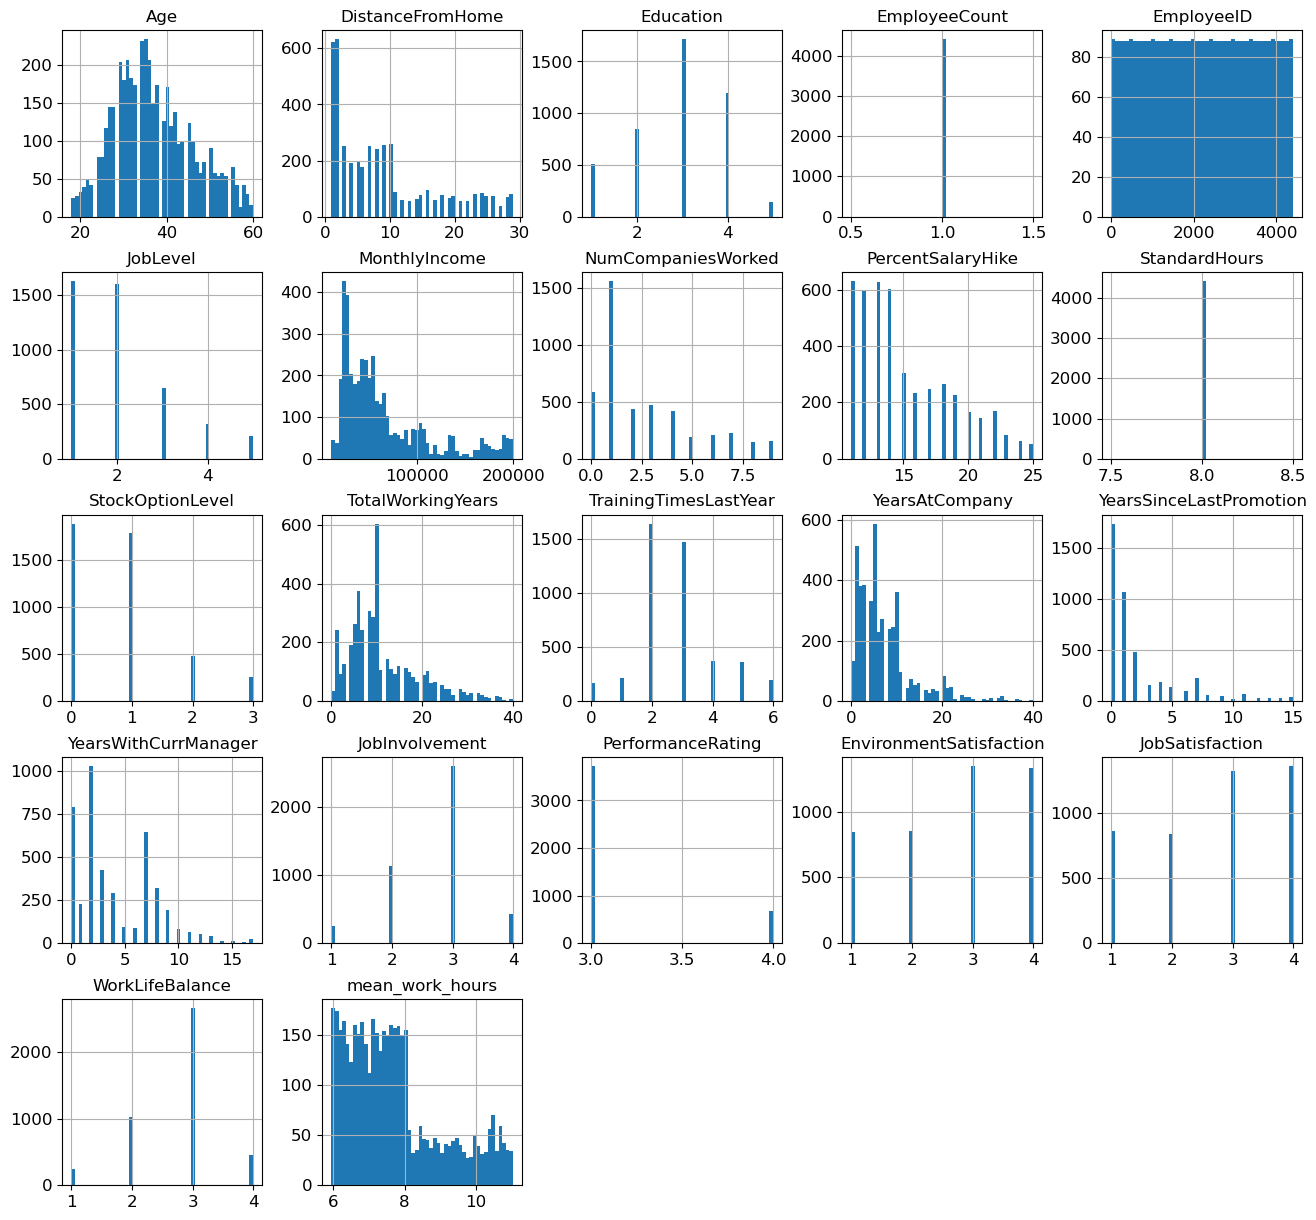

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

final_data.hist(bins=50,figsize=(16,15))
plt.show()

In [12]:
final_data["WorkLifeBalance"].value_counts()

WorkLifeBalance
3.0    2660
2.0    1019
4.0     454
1.0     239
Name: count, dtype: int64

# Data Analysis

To fill in the missing data, we need to use a different method for numerical and categorical data:

- **For numerical data**, we will use the **KNN algorithm**, which searches for the **k profiles closest** to our missing data to fill in the missing values.
- **For categorical data**, we use the **most common value** in the dataset to fill in the missing data.
a.

In [13]:
from sklearn.impute import KNNImputer
import pandas as pd

# Instantiate KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fill missing values for categorical columns using mode
categorical_columns = ['WorkLifeBalance', 'EnvironmentSatisfaction', 'JobSatisfaction']
for col in categorical_columns:
    final_data[col] = final_data[col].fillna(final_data[col].mode()[0])

# Ensure numeric columns are of correct type
numeric_columns_with_missing_values = ['NumCompaniesWorked', 'TotalWorkingYears']

# Convert columns to numeric, coercing errors to NaN
final_data[numeric_columns_with_missing_values] = final_data[numeric_columns_with_missing_values].apply(pd.to_numeric, errors='coerce')

# Apply KNN Imputation for numeric columns
final_data[numeric_columns_with_missing_values] = knn_imputer.fit_transform(final_data[numeric_columns_with_missing_values])

We can observe that the entire data set is well processed and that there are no more missing values:

In [14]:
print(final_data.isnull().sum().sort_values(ascending=False))

Age                        0
Attrition                  0
WorkLifeBalance            0
JobSatisfaction            0
EnvironmentSatisfaction    0
PerformanceRating          0
JobInvolvement             0
YearsWithCurrManager       0
YearsSinceLastPromotion    0
YearsAtCompany             0
TrainingTimesLastYear      0
TotalWorkingYears          0
StockOptionLevel           0
StandardHours              0
PercentSalaryHike          0
Over18                     0
NumCompaniesWorked         0
MonthlyIncome              0
MaritalStatus              0
JobRole                    0
JobLevel                   0
Gender                     0
EmployeeID                 0
EmployeeCount              0
EducationField             0
Education                  0
DistanceFromHome           0
Department                 0
BusinessTravel             0
mean_work_hours            0
dtype: int64


In [15]:
import numpy as np
import pandas as pd


# Make a copy of the dataset
df = final_data.copy()

categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=[np.number]).columns


# Process outliers column by column using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)




# Display cleaned dataset
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_work_hours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,4.5,1,0.0,0.0,3,3,3.0,4.0,2.0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3.0,5,1.0,4.0,2,3,3.0,2.0,4.0,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2.0,5,0.0,3.0,3,3,2.0,2.0,1.0,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,4.5,8,7.0,5.0,2,3,4.0,4.0,3.0,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2.0,6,0.0,4.0,3,3,4.0,1.0,3.0,8.006175


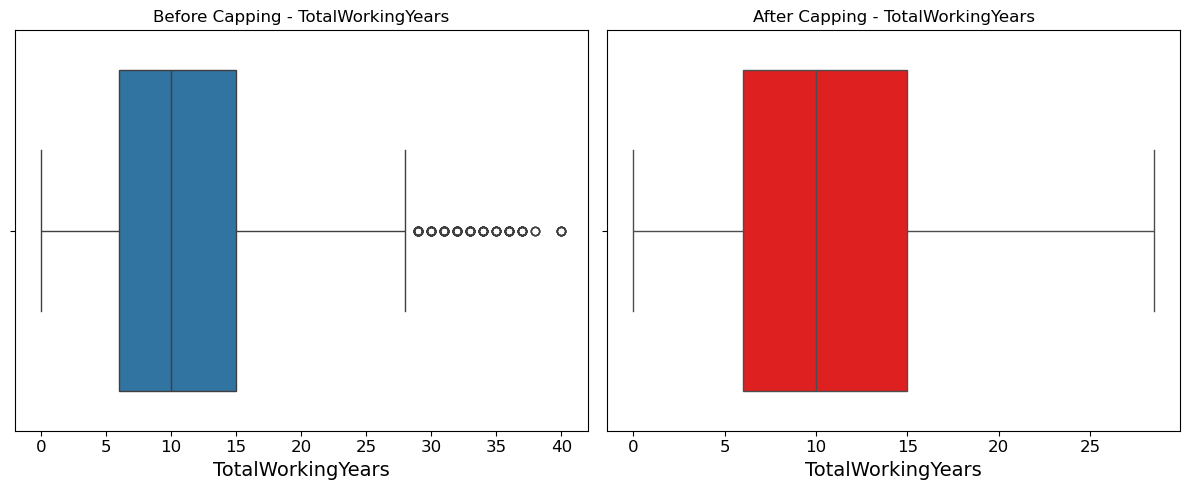

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 5))

# Boxplot before capping
plt.subplot(1, 2, 1)
sns.boxplot(x=final_data["TotalWorkingYears"])
plt.title("Before Capping - TotalWorkingYears")

# Boxplot after capping
plt.subplot(1, 2, 2)
sns.boxplot(x=df["TotalWorkingYears"], color='red')
plt.title("After Capping - TotalWorkingYears")

plt.tight_layout()
plt.show()

We are going to calculate the correlation coefficients between the numeric fields, so we need to remove all the categorical fields that contain values ​​with numbers like: 1,2,3...

In [17]:
df.head()
final_Numeric_data = df.copy() # A new copy of data set 
final_Numeric_data.drop("EmployeeCount", axis=1, inplace=True) # Not numerical 
final_Numeric_data.drop("EmployeeID", axis=1, inplace=True) # Not numerical 
final_Numeric_data.drop("StandardHours", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("JobInvolvement", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("PerformanceRating", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("EnvironmentSatisfaction", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("JobSatisfaction", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("WorkLifeBalance", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("Education", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("JobLevel", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("Attrition", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("BusinessTravel", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("Department", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("EducationField", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("Gender", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("Over18", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("MaritalStatus", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("StockOptionLevel", axis=1, inplace=True) # Not numerical
final_Numeric_data.drop("JobRole", axis=1, inplace=True) # Not numerical
final_Numeric_data.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean_work_hours
0,51,6,131160,1.0,11,1.0,4.5,1,0.0,0.0,7.373651
1,31,10,41890,0.0,23,6.0,3.0,5,1.0,4.0,7.718969
2,32,17,165835,1.0,15,5.0,2.0,5,0.0,3.0,7.013240
3,38,2,83210,3.0,11,13.0,4.5,8,7.0,5.0,7.193678
4,32,10,23420,4.0,12,9.0,2.0,6,0.0,4.0,8.006175


In [18]:
import numpy as np

# Step 1: Filter numeric columns only
numeric_data = final_Numeric_data.select_dtypes(include=[np.number])
# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_data.corr()


### Correlation between numerical field 
Once the correlation coefficients are calculated, we can only keep those that have a coefficient lower than a certain number, because when they are, for example, correlated at more than 0.80, it is not interesting to keep both fields; we can only keep one

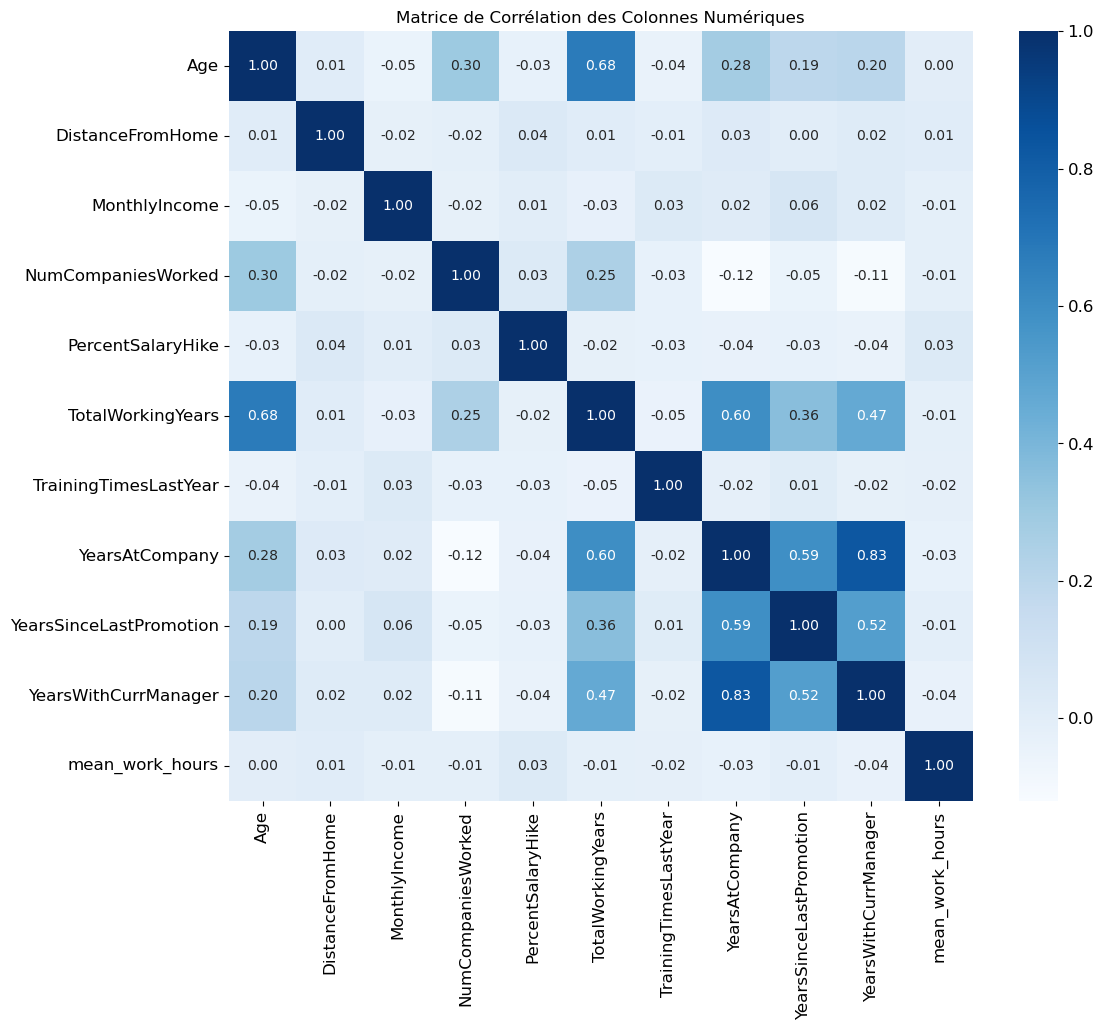

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matrice de Corrélation des Colonnes Numériques")
plt.show()

In [20]:

# Step 3: Identify pairs with correlations above the threshold
threshold = 0.8  # Par exemple, 0.8 (modifier si nécessaire)
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Retrieve only the top part to avoid duplicates
upper_corr_matrix = correlation_matrix.where(upper_triangle)

# Columns with high correlation
drop_columns = [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > threshold)]

print("\n=== Colonnes à Supprimer ===")
print(drop_columns)


=== Colonnes à Supprimer ===
['YearsWithCurrManager']


Ir we can remove 'YearsWithCurrManager' as it is a field that is strongly correlated to 'YearsAtCompany'

In [21]:
# Step 4: Remove selected columns from the final dataframe
print("\nBefore")
print(df.shape)
df = df.drop(columns=drop_columns)

# Verification
print("\nAfter")
print(df.shape)





Before
(4410, 30)

After
(4410, 29)


# Encoding (one hot, label and ordinal encoding)

In [22]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder



# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Define encoding strategies
label_col = ['Attrition']
ordinal_col = ['BusinessTravel']
nominal_cols = list(set(categorical_cols) - set(label_col) - set(ordinal_col))

# Apply Label Encoding for Attrition
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

# Apply Ordinal Encoding for BusinessTravel
ordinal_encoder = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])  # Modify order if needed
df['BusinessTravel'] = ordinal_encoder.fit_transform(df[['BusinessTravel']])

# Apply One-Hot Encoding for remaining categorical columns
# Apply One-Hot Encoding for remaining categorical columns and convert to integers
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True).astype(int)
df.head()
df.to_csv('cleaned_dataset.csv', index=False)

# Chi-Square Test for Categorical Variables and Attrition

## Statistical Purpose
The Chi-Square test of independence evaluates whether **categorical variables** (e.g., Department, Gender, Marital Status) are statistically associated with employee attrition. This analysis helps identify potential factors influencing attrition decisions.

## Mathematical Foundation

### Test Hypothesis
- **Null Hypothesis (H₀):** No association exists between the categorical variable and attrition (independence).
- **Alternative Hypothesis (H₁):** An association exists between the categorical variable and attrition (dependence).

### Chi-Square Test Statistic
The Chi-Square statistic is calculated as:

$$
\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Where:
- \( O_{ij} \): Observed frequency in cell \((i,j)\)
- \( E_{ij} \): Expected frequency in cell \((i,j)\) under independence
- \( r \): Number of rows in contingency table
- \( c \): Number of columns in contingency table

### Expected Frequency Calculation
For each contingency table cell:
$$
E_{ij} = \frac{(\text{Row } i \text{ Total}) \times (\text{Column } j \text{ Total})}{\text{Grand Total}}
$$

### Degrees of Freedom
$$
df = (r - 1) \times (c - 1)
$$

### Decision Rule
- **Reject H₀** if \( p\text{-value} < \alpha \) (typically \( \alpha = 0.05 \))
- **Fail to reject H₀** if \( p\text{-value} \geq \alpha \)

In [23]:
df = pd.read_csv("cleaned_dataset.csv")  # Ensure the correct file path
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                4410 non-null   int64
 1   Attrition                          4410 non-null   int64
 2   BusinessTravel                     4410 non-null   int64
 3   DistanceFromHome                   4410 non-null   int64
 4   Education                          4410 non-null   int64
 5   EmployeeCount                      4410 non-null   int64
 6   EmployeeID                         4410 non-null   int64
 7   JobLevel                           4410 non-null   int64
 8   MonthlyIncome                      4410 non-null   int64
 9   NumCompaniesWorked                 4410 non-null   int64
 10  PercentSalaryHike                  4410 non-null   int64
 11  StandardHours                      4410 non-null   int64
 12  StockOptionLevel    

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load dataset (Modify this path if needed)
df = pd.read_csv("cleaned_dataset.csv")  # Ensure the correct file path


# Ensure 'Attrition' column exists
if "Attrition" not in df.columns:
    raise KeyError("The column 'Attrition' is missing from the dataset.")

# Define categorical features that were originally non-numeric
categorical_cols = ['BusinessTravel', 'Department_Research & Development', 'Department_Sales', 'Education', 'JobRole', 'MaritalStatus','JobLevel','JobInvolment','PerformanceRating','EnvironmentSatisfaction','WorkLifeBalance','JobRole_Human Resources','JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive','JobRole_Sales Representative','MaritalStatus_Married','MaritalStatus_Single','Gender_Male','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree']

# Ensure categorical columns exist in df
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Dictionary to store chi-square test results
chi2_results = {}

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df["Attrition"])  # Create contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)  # Perform chi-square test
    
    # Store full-precision p-values
    chi2_results[col] = p  

# Convert results to DataFrame with full precision
chi2_df = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'P-Value'])

# Print results sorted by P-Value with full precision
print("Chi-square test results sorted by P-Value:")
print(chi2_df.sort_values(by="P-Value").to_string(index=False, float_format='{:0.20f}'.format))

# Drop features with a p-value greater than 0.05 (insignificant features)
insignificant_features = chi2_df[chi2_df['P-Value'] > 0.05]['Feature'].tolist()

# Drop insignificant features from the dataframe
df_cleaned = df.drop(columns=insignificant_features)
df_cleaned.drop("EmployeeCount", axis=1, inplace=True) # Useless field
df_cleaned.drop("StandardHours", axis=1, inplace=True) # Useless field

df_cleaned.info()

# Save the cleaned dataset to a new file
df_cleaned.to_csv("cleaned_dataset_dropped.csv", index=False)

# Print the columns that were dropped
print("\nDropped features (insignificant based on p-value > 0.05):")
print(insignificant_features)


Chi-square test results sorted by P-Value:
                          Feature                P-Value
             MaritalStatus_Single 0.00000000000000000000
                   BusinessTravel 0.00000000000000017643
          EnvironmentSatisfaction 0.00000000000005780512
                  WorkLifeBalance 0.00000000009768882773
            MaritalStatus_Married 0.00000000196188697370
        JobRole_Research Director 0.00130795954107224954
   JobRole_Manufacturing Director 0.00296998066881883679
  EducationField_Technical Degree 0.00859885107141162772
       JobRole_Research Scientist 0.07635562481720732653
             EducationField_Other 0.10213290003031692821
                         JobLevel 0.17992768013371859825
                 Department_Sales 0.20534791064852717102
                        Education 0.22759826301782393188
                      Gender_Male 0.24529482862926826892
                  JobRole_Manager 0.27073305981533835052
Department_Research & Development 0.330334297

In [25]:
# Check the final cleaned dataframe
print("\nFinal cleaned dataset after dropping insignificant features:")
print(df_cleaned.head())


Final cleaned dataset after dropping insignificant features:
   Age  Attrition  BusinessTravel  DistanceFromHome  EmployeeID  \
0   51          0               1                 6           1   
1   31          1               2                10           2   
2   32          0               2                17           3   
3   38          0               0                 2           4   
4   32          0               1                10           5   

   MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0         131160                   1                 11                 0   
1          41890                   0                 23                 1   
2         165835                   1                 15                 2   
3          83210                   3                 11                 2   
4          23420                   4                 12                 2   

   TotalWorkingYears  ...  JobInvolvement  EnvironmentSatisfaction  \
0 

# Feature Selection and Data Cleaning

After performing the **Chi-Square test**, we identified and dropped **insignificant categorical features** that did not have a strong relationship with the target variable.

Additionally, we removed certain columns that **had no impact on the analysis**, such as:

- **EmployeeID**: This is just an assigned identifier and does not contribute to predicting the target variable.
- **StandardHours, Over18, and PerformanceRating**: These columns had no variance or provided no meaningful information for our model.
- **Gender**: This feature was dropped based on its statistical insignificance in the Chi-Square test.

After performing **feature selection**, we also dropped other features that had **low importance** in predicting the target variable, ensuring that our dataset only includes the most relevant features.

Finally, we saved the cleaned dataset as `cleaned_dataset_dropped.csv` for further analysis.


In [26]:
df_test = pd.read_csv("cleaned_dataset_dropped.csv")
print(df_test.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'EmployeeID',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'JobInvolvement',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'mean_work_hours', 'EducationField_Technical Degree',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'JobRole_Manufacturing Director', 'JobRole_Research Director'],
      dtype='object')


## Count Plot: Categorical Distribution by Attrition

A **count plot** visually represents the distribution of categorical variables, split by Attrition. It helps in understanding how different categories relate to employee Attrition, making it easier to spot trends and patterns.

### **Why Use a Count Plot?**
- **Compares distributions** of categorical features across Attrition classes.
- Helps **identify imbalances** in the dataset.
- Provides an **intuitive visualization** of employee characteristics.

### **Implementation Steps**
1. Select categorical features to analyze.
2. Use a count plot to display the frequency of each category.
3. Differentiate Attrition values using color (hue).

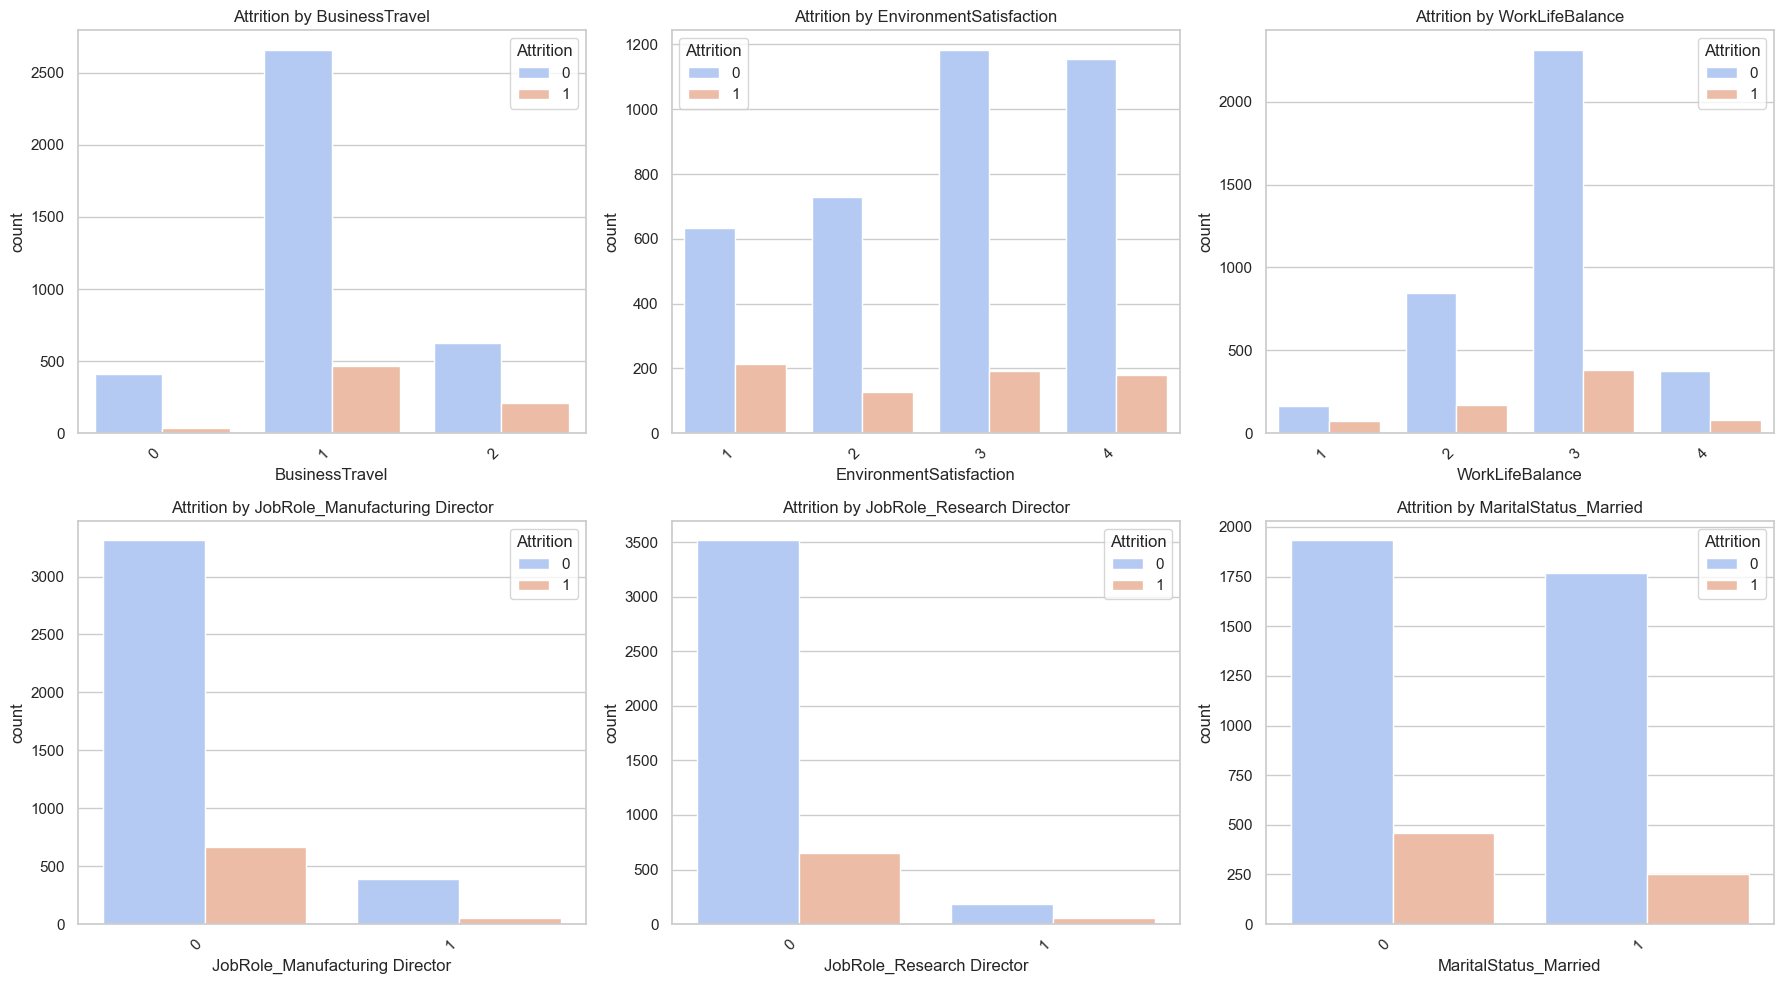

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Load the cleaned dataset (after dropping insignificant features)
df_cleaned = pd.read_csv("cleaned_dataset_dropped.csv")  # Use the cleaned dataset

# Filter categorical features that are significant (p-value <= 0.05)
# This should already be done, but ensure it aligns with the cleaned dataset
significant_features = chi2_df[chi2_df["P-Value"] <= 0.05]["Feature"].tolist()

# Only keep significant features that are still in df_cleaned
significant_features = [col for col in significant_features if col in df_cleaned.columns]

# Create subplots for each significant categorical column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for ax, col in zip(axes.flatten(), significant_features):
    sns.countplot(data=df_cleaned, x=col, hue="Attrition", ax=ax, palette="coolwarm")  # Use df_cleaned
    ax.set_title(f"Attrition by {col}")

    # Fix the tick labels by setting both ticks and labels
    ax.set_xticks(ax.get_xticks())  # Ensure fixed tick positions
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate properly

# Remove empty subplots if there are fewer significant features than subplots
for ax in axes.flatten()[len(significant_features):]:
    ax.remove()

plt.tight_layout()
plt.show()



### 6. Scaling Numerical Data Using RobustScaler

In machine learning, **scaling** is an essential step for preprocessing the data, especially when using algorithms sensitive to the magnitude of the features (such as k-nearest neighbors, logistic regression, etc.). In this process, we scale the numerical columns of the dataset to bring them to a similar range and ensure that all features contribute equally to the model.

In this case, we use the **RobustScaler**, which is particularly useful for scaling features that contain **outliers**. Unlike standard scaling methods like **StandardScaler**, the **RobustScaler** uses the **median** and **interquartile range (IQR)** for scaling, making it more robust to outliers.

#### Steps:

1. **Load Dataset**: The dataset is loaded into a DataFrame (`df`) from the file `cleaned_dataset.csv`.

2. **Identify Categorical Columns**: We define a list of **categorical columns** that should **not** be scaled. These include identifiers like `EmployeeID`, categorical variables like `Gender`, `MaritalStatus`, etc. These columns contain data that should remain in their original form for analysis.

3. **Select Numerical Columns**: We automatically select the **numerical columns** (those of type `int64` or `float64`) in the dataset and filter out the categorical columns. These numerical columns are the ones that will be scaled.

4. **Initialize RobustScaler**: We create an instance of the **RobustScaler**, which will scale the numerical data based on the median and interquartile range.

5. **Apply Scaling**: Using the `fit_transform()` method of **RobustScaler**, we apply the scaling only to the selected numerical columns. This ensures that the scaling does not affect the categorical data.

6. **Check the Scaled Data**: The `.describe()` method is used to generate a summary of the scaled data, providing insights into the distribution of the scaled numerical features.

7. **Save the Scaled Dataset**: Finally, the scaled dataset is saved to a new CSV file (`scaled_dataset.csv`) for further analysis or use in modeling.

### Why Use RobustScaler?

- **Outlier Resistance**: Unlike other scalers (e.g., `StandardScaler`), **RobustScaler** is less sensitive to outliers because it uses the **median** and **IQR** rather than the **mean** and **standard deviation**.
- **Feature Normalization**: Scaling the features helps prevent certain features from dominating the learning process due to their larger magnitude. This can lead to better model performance, particularly in distance-based algorithms.

In [28]:
from sklearn.preprocessing import RobustScaler

# Load the cleaned dataset
df = pd.read_csv("cleaned_dataset_dropped.csv")


# List of categorical columns (that should NOT be scaled)
categorical_columns = [
    'BusinessTravel', 'Department', 'EducationField', 'EmployeeCount', 'MaritalStatus', 'StandardHours'
]

# Check if any categorical columns were dropped but still listed
missing_categorical = [col for col in categorical_columns if col not in df.columns]
if missing_categorical:
    print(f"Warning: These categorical columns are not in the dataset (likely dropped): {missing_categorical}")
    categorical_columns = [col for col in categorical_columns if col in df.columns]

# Select only numerical columns (excluding categorical ones)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

# Verify numerical columns
print("\nNumerical columns to be scaled:")
print(numerical_columns)

# Check if any numerical columns were unexpectedly dropped
if not numerical_columns:
    raise ValueError("No numerical columns found to scale. Check the dataset and categorical_columns list.")

# Initialize RobustScaler
scaler = RobustScaler()

# Apply RobustScaler only to the selected numerical columns
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print summary to check scaling
print("\nSummary of scaled dataset:")
print(df_scaled.describe())

# Verify that categorical columns are unchanged
print("\nSample of categorical columns (should be unchanged):")
print(df_scaled[categorical_columns].head())

# Save the scaled dataset
df_scaled.to_csv("scaled_dataset.csv", index=False)
print("\nScaled dataset saved to 'scaled_dataset.csv'")


Numerical columns to be scaled:
['Age', 'Attrition', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'mean_work_hours', 'EducationField_Technical Degree', 'MaritalStatus_Married', 'MaritalStatus_Single', 'JobRole_Manufacturing Director', 'JobRole_Research Director']

Summary of scaled dataset:
               Age    Attrition  BusinessTravel  DistanceFromHome  \
count  4410.000000  4410.000000     4410.000000       4410.000000   
mean      0.071062     0.161224        1.086395          0.182710   
std       0.702562     0.367780        0.532049          0.675419   
min      -1.384615     0.000000        0.000000         -0.500000   
25%      -0.461538     0.000000        1.000000         -0.416667   
50%       0.000000     0.000000        1.000000   

# Feature Selection Using Random Forest

Feature Selection is the process of identifying and selecting the most relevant features (columns) in your dataset that significantly contribute to the predictive power of your model, while eliminating irrelevant or redundant ones.

### **Why is Feature Selection Important?**

- **Improve Model Accuracy** → Reduces noise in the data, allowing the model to focus on meaningful patterns.  
- **Reduce Overfitting** → Prevents the model from learning irrelevant patterns present in redundant features.  
- **Enhance Computational Efficiency** → Fewer features lead to faster training times and reduced resource consumption.  

By prioritizing impactful features, you build simpler, faster, and more interpretable models without sacrificing performance.

### Feature Selection with Random Forest

In this process, we use a **Random Forest Classifier** to identify the most important features from the dataset based on their contribution to predicting the target variable. Random Forests are an ensemble learning method that can naturally compute the importance of features during model training.

#### Steps:

1. **Load the Dataset**: The scaled dataset (`scaled_dataset.csv`) is loaded into a pandas DataFrame (`df`). The target column for prediction, `"Attrition"`, is identified.

2. **Separate Features and Target**: The dataset is split into **features** (`X`) and the **target** (`y`). The target variable `"Attrition"` is separated from the features.

3. **Initialize the Random Forest Model**: A **Random Forest Classifier** is initialized with 100 trees (`n_estimators=100`), which will be used to assess feature importance.

4. **Fit the Model**: The model is trained on the features (`X`) and the target (`y`). During this process, the Random Forest algorithm evaluates the importance of each feature in predicting the target variable.

5. **Get Feature Importances**: After fitting the model, the **feature importances** are extracted, which represent the relative importance of each feature in the prediction process.

6. **Create a DataFrame of Features and Importances**: A DataFrame (`feature_df`) is created with two columns: `Feature` and `Importance`, which contain the feature names and their respective importance scores.

7. **Sort by Importance**: The DataFrame is sorted by the `Importance` column in descending order to identify the most significant features.

8. **Select Top N Features**: The top N features (in this case, the top 10) are selected based on their importance and displayed as the final output.

#### Output:

The resulting DataFrame shows the **top 10 features** that have the highest importance in predicting **Attrition**. These features are deemed the most relevant for building a predictive model, and the others can potentially be removed to simplify the model and improve its performance.

This feature selection technique ensures that the most influential features are retained, optimizing the model for better accuracy and efficiency.


In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv("scaled_dataset.csv")

target_column = "Attrition"
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Initialize Random Forest model for feature selection
model = RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with features and their importances
feature_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort by importance
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Select top N features (e.g., top 10)
top_features = feature_df.head(10)

print(top_features)

                    Feature  Importance
0                       Age    0.101222
8         TotalWorkingYears    0.092942
4             MonthlyIncome    0.091306
16          mean_work_hours    0.079007
10           YearsAtCompany    0.071328
2          DistanceFromHome    0.068284
6         PercentSalaryHike    0.061915
5        NumCompaniesWorked    0.050319
13  EnvironmentSatisfaction    0.044861
14          JobSatisfaction    0.043182


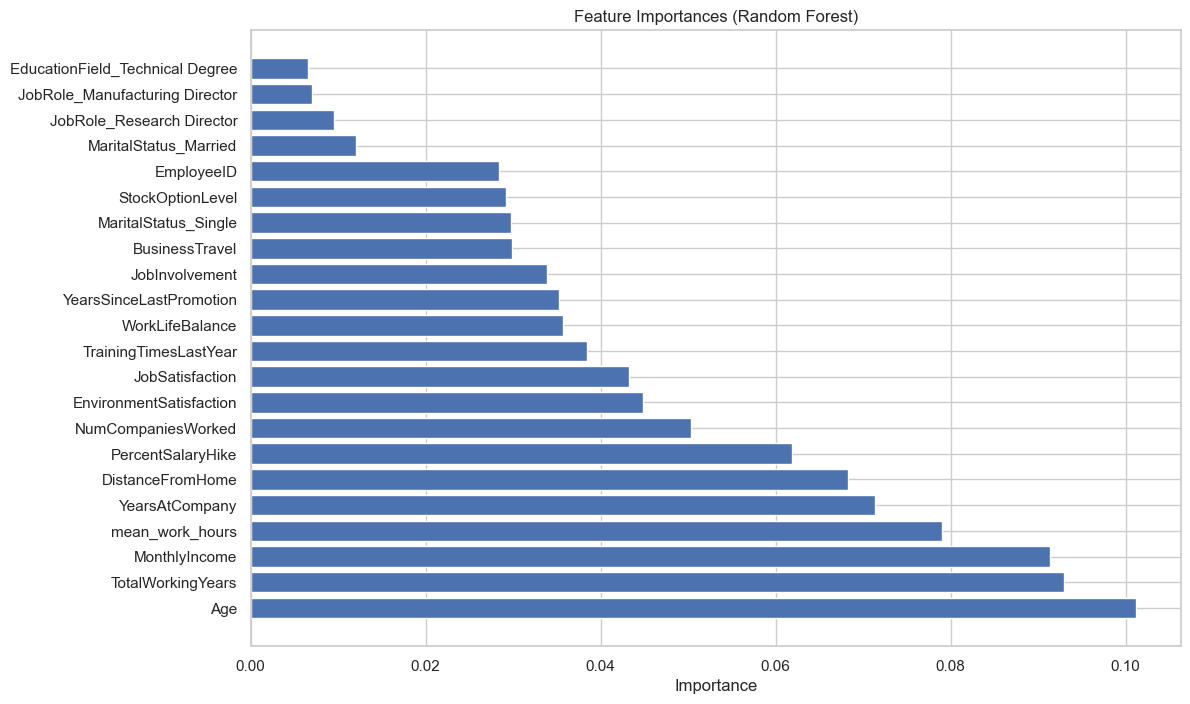

In [30]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.show()



# SVM model

**Support Vector Machine (SVM)** is a supervised learning algorithm used for **classification** and **regression tasks**. It works by finding the **optimal hyperplane** that best separates different classes in a dataset.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target variable (y)
X = df.drop(columns=["Attrition"])  # Drop target column
y = df["Attrition"]  # Target variable (binary)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_model = SVC(kernel="poly")  # You can try 'linear' or 'poly' too
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9126984126984127
Confusion Matrix:
[[738   3]
 [ 74  67]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       741
         1.0       0.96      0.48      0.64       141

    accuracy                           0.91       882
   macro avg       0.93      0.74      0.79       882
weighted avg       0.92      0.91      0.90       882



# Cross validation SVM

In [32]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print("Cross-Validation Results (Training Data):")

for scoring_metric in ['accuracy', 'precision', 'recall', 'f1']:
    cv_scores = cross_val_score(
        SVC(kernel="poly"),  # New model instance for CV
        X_test_scaled,
        y_test,
        cv=kfold,
        scoring=scoring_metric
    )
    print(f"Mean {scoring_metric}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



Cross-Validation Results (Training Data):
Mean accuracy: 0.8617 (±0.0283)
Mean precision: 0.8035 (±0.1624)
Mean recall: 0.1970 (±0.0481)
Mean f1: 0.3119 (±0.0626)


# ROC Curve (Svm model)

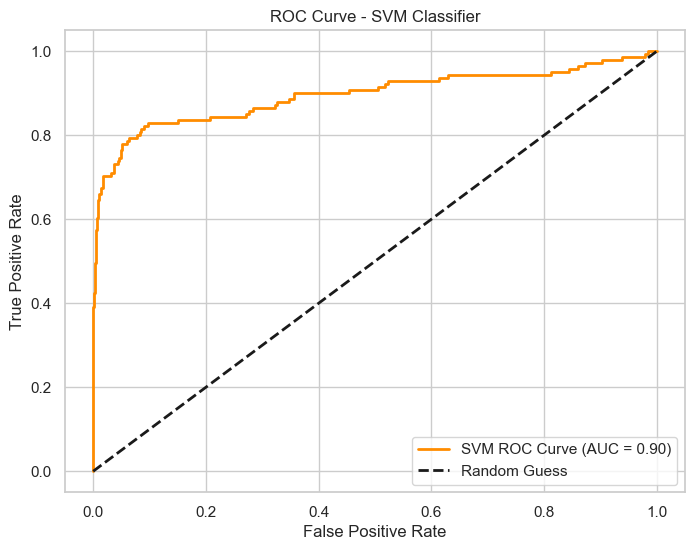

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make sure the model has probability=True
svm_model = SVC(kernel='poly', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Generate predictions (use scaled test data)
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'SVM ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Classifier")
plt.legend(loc="lower right")

# Save and display
plt.savefig("svm_roc_curve.png", bbox_inches='tight')  # Save before show()
plt.show()

# Random Forest: A Powerful Ensemble Model  

##  What is Random Forest?  
Random Forest is an **ensemble learning method** that constructs multiple **decision trees** and aggregates their predictions to enhance accuracy and reduce overfitting. It is widely used for both classification and regression tasks due to its robustness and flexibility.  

##  Advantages of Random Forest  
-  **High Accuracy** – Delivers strong predictive performance .  
-  **Resistant to Overfitting** – Combines multiple trees to generalize better.  
-  **Handles Class Imbalance Well** – Supports **balanced class weights**.  
-  **Works with High-Dimensional Data** – Effectively manages datasets with many features.  
-  **No Feature Scaling Required** – Unlike SVM or Logistic Regression, scaling isn’t necessary.  
-  **Feature Importance Ranking** – Helps identify the most influential variables in your dataset.  

##  Disadvantages of Random Forest  
-  **Computationally Intensive** – Training large forests requires significant resources.  
-  **Less Interpretable** – Harder to visualize compared to a single decision tree.  
-  **Higher Memory Usage** – Stores multiple trees, increasing storage needs.  
-  **Slower Predictions** – Ensemble methods can be slower than simpler models.  
-  **May Not Perform Well on Linear Data** – Not optimal for strictly linear relationships.  

##  Implementation Highlights  
 workflow includes:  
-  **Random Forest classifier integrated into a pipeline** for efficient model training.  
-  **Comprehensive evaluation metrics** showing outstanding performance.  
-  **Cross-validation** to ensure the model’s reliability and robustness.  
-  **Hyperparameter tuning with GridSearchCV**, optimizing tree depth, number of trees, and sampling strategies.  

results indicate an **exceptionally strong model**, we further improved it by performing hyperparameter tuning and a robust validation approach. 

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Add this import

# Load scaled dataset
df_scaled = pd.read_csv("scaled_dataset.csv")

# Define your target column name
target_column = "Attrition"  

# Split into features and target
X = df_scaled.drop(columns=[target_column])  # Features (drops target column)
y = df_scaled[target_column]  # Selects only the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create pipeline with Random Forest
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))  # Random Forest Classifier
])

In [36]:
# Fit the model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [37]:
# Test the model
y_pred = rf_pipeline.predict(X_test)

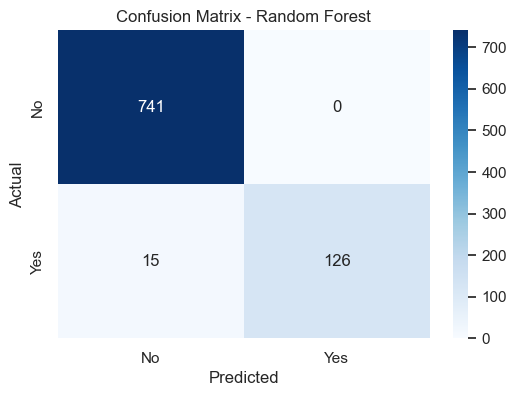

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

# Evaluate using confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#save_fig("random_forest_confusion_matrix")
plt.show()

In [39]:
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       741
         1.0       1.00      0.89      0.94       141

    accuracy                           0.98       882
   macro avg       0.99      0.95      0.97       882
weighted avg       0.98      0.98      0.98       882

ROC AUC Score: 0.999487945176635


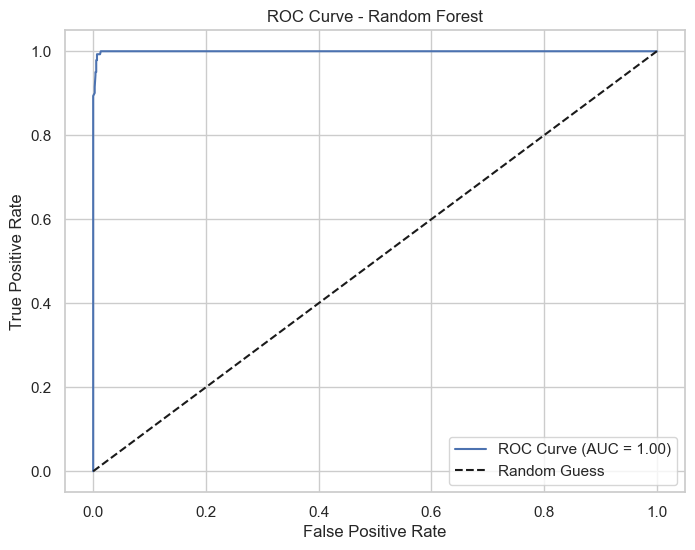

In [40]:
# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="best")
#save_fig("random_forest_roc_curve")
plt.show()

# cross validation
## training set

In [41]:


# Define the KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")


Mean CV Accuracy (Train): 0.9680
Mean CV Precision (Train): 0.9936
Mean CV Recall (Train): 0.8076
Mean CV F1 (Train): 0.8900
Mean CV Roc_auc (Train): 0.9845


# On Test Dataset

In [42]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(rf_pipeline, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.8764
Mean CV Precision (Test): 0.9185
Mean CV Recall (Test): 0.2758
Mean CV F1 (Test): 0.4126
Mean CV Roc_auc (Test): 0.8625


## Hyperparameter Tuning

- **n_estimators**: The number of decision trees in the forest. More trees generally improve model accuracy but increase computation time.
- **max_depth**: The maximum depth of each tree. Limiting the depth can help prevent overfitting.
- **min_samples_split**: The minimum number of samples required to split an internal node.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
- **max_features**: The number of features to consider when looking for the best split. It can be set to 'auto', 'sqrt', 'log2', or a custom value.
- **bootstrap**: Whether to use bootstrapping (sampling with replacement) for generating training subsets. Typically set to `True`.
- **criterion**: The function used to evaluate the quality of a split. Common options are "gini" (Gini impurity) and "entropy" (information gain).

In [43]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 50],  # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum number of samples in a leaf node
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=kfold,
    scoring='f1',  # Optimize for F1-score as per priority
    n_jobs=-1
)

# Fit grid search to training data
grid_search_rf.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search_rf.best_params_)

# Use the best model for predictions
rf_best_model = grid_search_rf.best_estimator_

# Test the model
y_pred_rf = rf_best_model.predict(X_test)

Best Hyperparameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


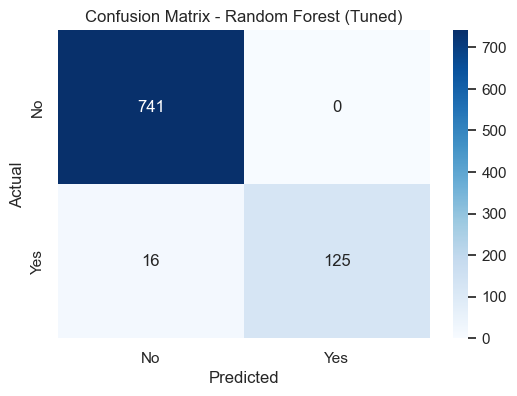

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       741
         1.0       1.00      0.89      0.94       141

    accuracy                           0.98       882
   macro avg       0.99      0.94      0.96       882
weighted avg       0.98      0.98      0.98       882

ROC AUC Score: 0.999665010863219


In [44]:
# Evaluate using confusion matrix and metrics
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#save_fig("random_forest_confusion_matrix_tuned")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, rf_best_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_rf)

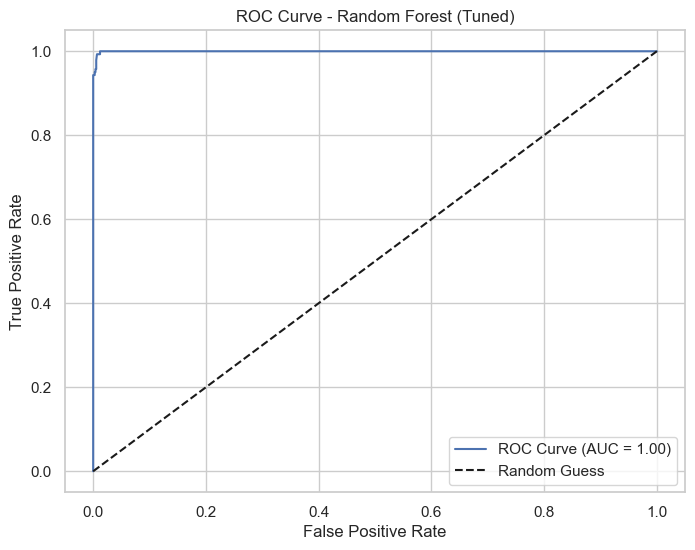

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute ROC curve values
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_best_model.predict_proba(X_test)[:, 1])

# Compute AUC score
roc_auc_rf = roc_auc_score(y_test, rf_best_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Tuned)")
plt.legend(loc="best")
#save_fig("random_forest_roc_curve_tuned")
plt.show()

In [46]:
# Cross-validation evaluation on training data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(rf_best_model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Train): {cv_scores.mean():.4f}")

Mean CV Accuracy (Train): 0.9711
Mean CV Precision (Train): 0.9937
Mean CV Recall (Train): 0.8268
Mean CV F1 (Train): 0.9019
Mean CV Roc_auc (Train): 0.9859


In [47]:
# Cross-validation evaluation on testing data with the best model
for scoring_metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    cv_scores = cross_val_score(rf_best_model, X_test, y_test, cv=kfold, scoring=scoring_metric)
    print(f"Mean CV {scoring_metric.capitalize()} (Test): {cv_scores.mean():.4f}")

Mean CV Accuracy (Test): 0.8832
Mean CV Precision (Test): 0.9778
Mean CV Recall (Test): 0.2939
Mean CV F1 (Test): 0.4415
Mean CV Roc_auc (Test): 0.8616


In [48]:
print(rf_best_model.named_steps)

{'rf': RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=42)}


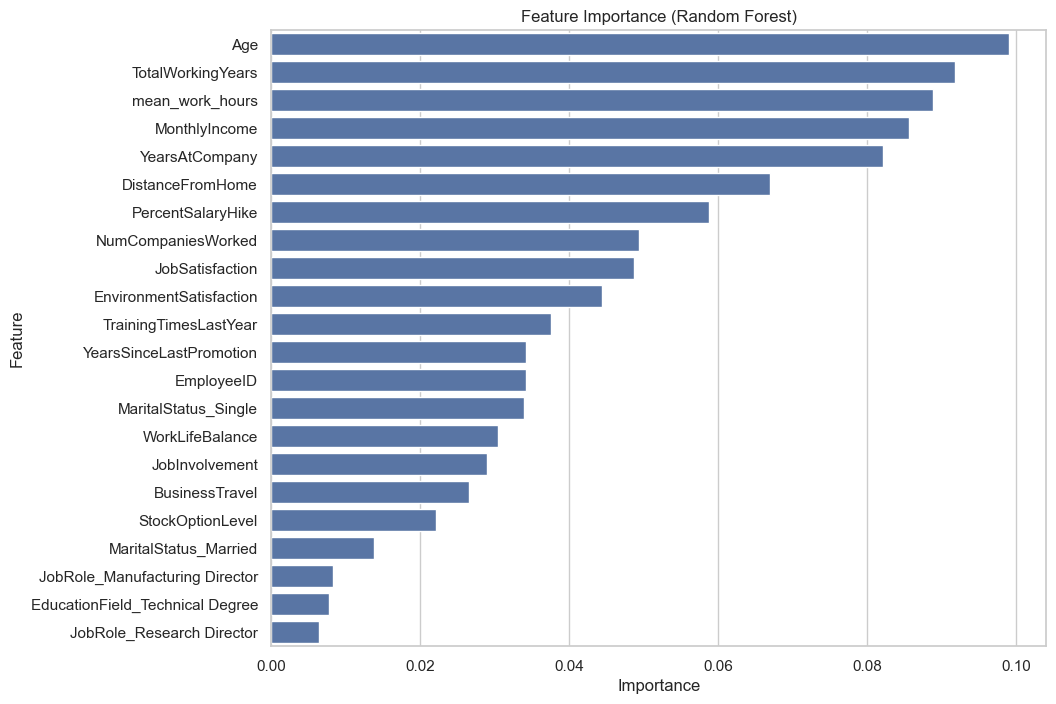

In [49]:
# Extract the RandomForestClassifier from the pipeline
rf_model = rf_best_model.named_steps['rf']  

# Now, get feature importances
feature_importance = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

# Elastic-Net

## What is Elastic-Net
Elastic Net is an advanced linear regression model. It combines two linear regression methods: Lasso and Ridge, each of which has its advantages. The goal of Elastic Net is to combine the two models and balance them to get the best possible output.

### Lasso (Least Absolute Shrinkage and Selection Operator)
This is a linear regression method that achieves two main things by introducing a penalty coefficient ($\lambda_1$):
- Limits overfitting
- Selects the most important variables
    
Linear regression is performed using a sum of the absolute values ​​of the coefficients. A coefficient introduced by the lasso model will allow some coefficients to be reduced and even others to become 0.
Minimize the following function:


$
    2 \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda_1 \sum_{j=1}^{p} |\beta j|
$


With :

- $  y_i  $ : actual target values,
- $  \hat{y_i}  $ : the model's predictions,
- $  \beta_j  $ : the coefficients of the model,
- $  \lambda_1  $ : the regularization parameter (hyperparameter).meter).

Thanks to this coefficient $ \lambda_1 $ certain values ​​are therefore deleted and others are reduced, which makes it possible to reduce the size of the data set.

### Ridge

Ridge regression is another variant of linear regression, but instead of penalizing the sum of the absolute values ​​of the coefficients, it penalizes the sum of the squares of the coefficients.
However, the penalty $\lambda_2$ cannot be equal to 0; it serves to reduce the impact of irrelevant values.

Minimize the following function:


$ 2 \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda_2 \sum_{j=1}^{p} \beta_j^2 $


with :

- $  y_i  $ : actual target values,
- $  \hat{y_i}  $ : the model's predictions,
- $  \beta_j  $ : the coefficients of the model,
- $  \lambda_2  $ : the regularization parameter (hyperparameter).

### Elastic-Net

Elastic-Net then combines the two previous methods, resulting in:

Minimize the following function:


$ 2 \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2 $


With :

- $  \lambda_1  $ : weight of the Lasso term (L1),
- $  \lambda_2  $ : Ridge term weight (L2),
- $  y_i  $ : actual target values,
- $  \hat{y_i}  $ : the model's predictions,
- $  \beta_j  $ : the coefficients of the model.

#### Take cleaned data from the csv file 

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import (classification_report, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve, 
                             matthews_corrcoef, confusion_matrix)
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

file_path = os.path.abspath("C:/Users/sixel/ia/cleaned_dataset.csv")
data = pd.read_csv(file_path)

print("Data :")
print(data.head())

Data :
   Age  Attrition  BusinessTravel  DistanceFromHome  Education  EmployeeCount  \
0   51          0               1                 6          2              1   
1   31          1               2                10          1              1   
2   32          0               2                17          4              1   
3   38          0               0                 2          5              1   
4   32          0               1                10          1              1   

   EmployeeID  JobLevel  MonthlyIncome  NumCompaniesWorked  ...  \
0           1         1         131160                   1  ...   
1           2         1          41890                   0  ...   
2           3         4         165835                   1  ...   
3           4         3          83210                   3  ...   
4           5         1          23420                   4  ...   

   MaritalStatus_Single  Gender_Male  JobRole_Human Resources  \
0                     0            0  

#### Define the target value and define train and test 

In [51]:
X = data.drop(data.columns[1], axis=1).values  # All columns except the second (index 1) for features
y = data.iloc[:, 1].values  # Second column (index 1) as target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lr_pipeline = Pipeline([
    ('lr', LogisticRegression(random_state=42, solver='saga', penalty='elasticnet'))
])

#### Hyperparameter grid 

The hypermeter grid is used to define several regulation intensity values ​​for the coefficients $\lambda_1$ and $\lambda_2$ and choose the values ​​that have the best results

In [52]:
param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10, 15],  
    'lr__l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.8]  
}

#### Cross validation Kfold 

It is useful to do kfold cross-validation to allow defining training and test sets multiple times to help avoid some problems of random distribution of data between the test and training sets.

In [53]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#### GridSearchCV

This function is used to find the best hyperparameters such as the best lr__C and lr__l1_ratio coefficients for the lasso and ridge methods

In [54]:
grid_search_lr = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=param_grid_lr,
    cv=kfold,
    scoring='f1',  
    n_jobs=-1
)

#### Models trainning 

In [55]:
grid_search_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('lr',
                                        LogisticRegression(penalty='elasticnet',
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.01, 0.1, 1, 10, 15],
                         'lr__l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.8]},
             scoring='f1')

In [56]:
print("Best hyperparameters:", grid_search_lr.best_params_)
lr_best_model = grid_search_lr.best_estimator_

Best hyperparameters: {'lr__C': 1, 'lr__l1_ratio': 0.5}


In [57]:
y_pred_lr = lr_best_model.predict(X_test_scaled)
y_pred_proba_lr = lr_best_model.predict_proba(X_test_scaled)[:, 1]

#### Accuracy

The proportion of correctly predicted observations (both true positives and true negatives) out of the total observations :

$$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Observations}} $$

In [58]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8571


#### Precision 

Out of all the observations predicted as positive (class 1), how many are actually positive.

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

In [59]:
precision = precision_score(y_test, y_pred_lr)
print(f"Précision (Precision): {precision:.4f}")

Précision (Precision): 0.6190


#### Recall 

Out of all the actual positive observations, how many did the model correctly identify?

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

In [60]:
recall = recall_score(y_test, y_pred_lr)
print(f"(Recall): {recall:.4f}")

(Recall): 0.2766


#### F1-Score

The harmonic mean of precision and recall. It provides a balanced measure when there is a trade-off between precision and recall

$$ \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [61]:
f1 = f1_score(y_test, y_pred_lr)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.3824


#### ROC Curve
A graphical plot that illustrates the trade-off between the true positive rate (recall) and the false positive rate (FPR) for different classification thresholds.

AUC-ROC: 0.7647


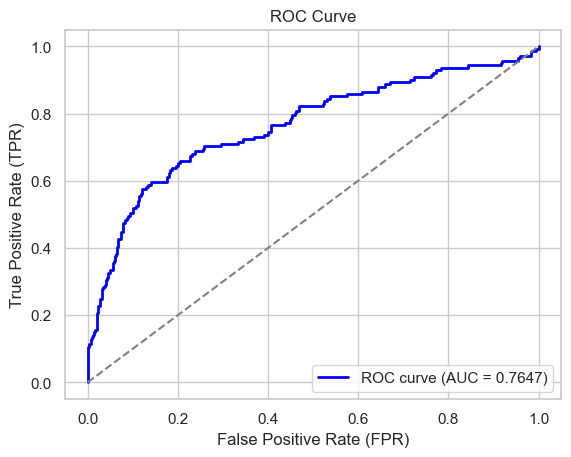

In [62]:
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"AUC-ROC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
print("\nRapport de Classification :\n", classification_report(y_test, y_pred_lr))


Rapport de Classification :
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       741
           1       0.62      0.28      0.38       141

    accuracy                           0.86       882
   macro avg       0.75      0.62      0.65       882
weighted avg       0.83      0.86      0.83       882



In [64]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("\nMatrice de Confusion :\n", conf_matrix)


Matrice de Confusion :
 [[717  24]
 [102  39]]


### Comparaison des Modèles 


| Metric      | Random Forest                                         | SVM                                                 | Elastic-Net                                         |
|-------------|-------------------------------------------------------|----------------------------------------------------|----------------------------------------------------|
| Accuracy    | <span style="color:green">0.8821</span>              | <span style="color:orange">0.8617</span>           | <span style="color:red">0.8571</span>          |
| Precision   | <span style="color:green">0.9455</span>              | <span style="color:orange">0.8035</span>           | <span style="color:red">0.6190</span>             |
| Recall      | <span style="color:green">0.2997</span>             | <span style="color:red">0.1970</span>          | <span style="color:orange">0.2766</span>          |
| F1-Score    | <span style="color:green">0.4427</span>             | <span style="color:red">0.3119</span>           | <span style="color:orange">0.3824</span>          |
| AUC-ROC     | <span style="color:orange">0.8585</span>              | <span style="color:green">0.9000</span>           | <span style="color:red">0.7647</span>          |


### Performance Analysis
#### 1. Accuracy

    Random Forest (88.21%) has the highest accuracy, indicating it correctly classifies a higher proportion of cases than the other models.
    SVM (86.17%) is slightly behind, still performing well in terms of correct overall classifications.
    Elastic-Net (85.71%) comes in last for accuracy but remains reasonably competitive.

#### 2. Precision

    Random Forest (94.55%) outperforms the other models in precision, meaning most of the positive predictions it makes are correct. This is an essential metric if minimizing false positives is critical.
    SVM (80.35%) holds a distant second place, with a relatively high but not exceptional precision.
    Elastic-Net (61.90%) performs poorly in this metric, suggesting it generates more false positives.

#### 3. Recall

    Random Forest (29.97%) has a low recall, identifying only a small proportion of the actual positive cases. It suggests the model misses a significant number of employees likely to leave.
    Elastic-Net (27.66%) offers a slightly worse recall than Random Forest but still outperforms SVM.
    SVM (19.70%) has the lowest recall, indicating it performs the worst at capturing the positive cases.

#### 4. F1-Score

The F1-score represents the balance between precision and recall:  

    Random Forest (44.27%) achieves the highest F1-score, making it the best at finding a trade-off between precision and recall.
    Elastic-Net (38.24%) comes second, performing moderately well when considering both false positives and false negatives.
    SVM (31.19%) has the weakest F1-score, highlighting its underperformance in managing this precision-recall trade-off.

#### 5. AUC-ROC

The AUC-ROC measures a model's ability to discriminate between classes:

    SVM (0.9000) has the highest AUC-ROC score, demonstrating its strong global capacity to distinguish between employees likely to stay and those likely to leave.
    Random Forest (0.8585) follows closely, with a solid AUC-ROC score, indicating it is an excellent discriminator overall.
    Elastic-Net (0.7647) has the lowest AUC-ROC among the models, suggesting it is less capable of separating the two classes effectively.

### Conclusion

The Random Forest model emerges as the best choice for the following reasons:

    Highest Precision (94.55%): A strong precision ensures that false positives (employees wrongly classified as likely to leave) are minimized. This prevents unnecessary intervention for employees who are not actually at risk.
    Balanced F1-Score (44.27%): While its recall (29.97%) is lower, Random Forest strikes a suitable trade-off between precision and recall, making it a reliable option for accurately identifying potential leavers.
    Good AUC-ROC (0.8585%): It effectively distinguishes between employees likely to leave and stay, ensuring a robust overall performa

This project highlights the impact of machine learning in addressing key business challenges, such as employee attrition. By identifying the Random Forest model as the most effective predictor, HumanForYou gains a powerful tool for proactive decision-making. 

The data-driven solutions presented offer a strategic approach to reducing turnover, improving employee satisfaction, and strengthening organizational performance. Through continuous monitoring and adaptation, this predictive framework will not only promote talent retention but also position HumanForYou as a leader in employee engagement and workforce stability.nce.

### Bibliography

https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html- random forest classifier

https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/ Random Forest Algorithm in Machine Learning,

 https://www.geeksforgeeks.org/understanding-logistic-regression/ - Logistic Regression in Machine Learnin

https://scikit-learn.org/stable/machine_learning_map.html - Overview of with model we need to try

https://scikit-learn.org/stable/modules/linear_model.html#elastic-net - How to use Elastic Net 

https://www.youtube.com/watch?v=-Wl2px-jW1A&ab_channel=LeCoinStat - Understand Lasso Ridge and Elastic Net

https://www.youtube.com/watch?v=QQN5NjJtUcc&ab_channel=AIforyou-MorganGautherot  - Understand Random Forest

https://scikit-learn.org/stable/modules/svm.html.
how to use SVM

https://www.geeksforgeeks.org/support-vector-machine-algorithm/. 
 live exemple of svm in python

https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
How to deal with outliers

https://medium.com/@anushree33/handling-outliers-bf82cffb2d06#:~:text=Capping%20is%20the%20process%20of,is%20taken%20inside%20the%20boundary

How does capping workg